# Importing the relevant libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

### Importing the Database

In [104]:
data = pd.read_csv('ml_datasource.csv')

In [105]:
data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


In [107]:
data.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
mean,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


Plot the different features


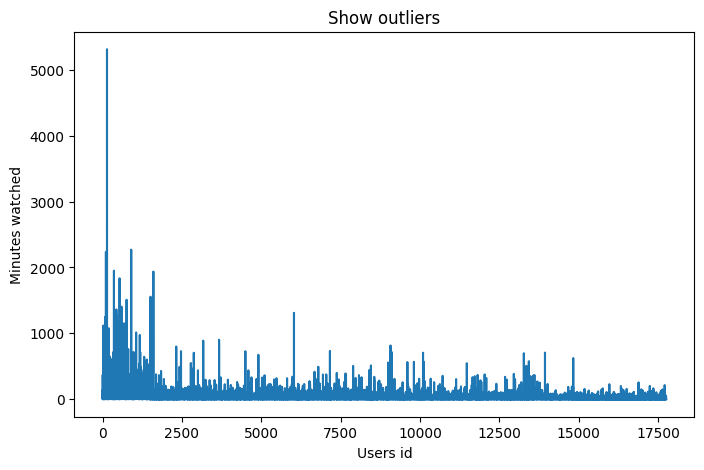

In [108]:
plt.figure(figsize=(8,5))
plt.plot(data['minutes_watched'])
plt.title('Show outliers')
plt.xlabel('Users id')
plt.ylabel('Minutes watched')
plt.show()

In [109]:
data.columns

Index(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased'],
      dtype='object')

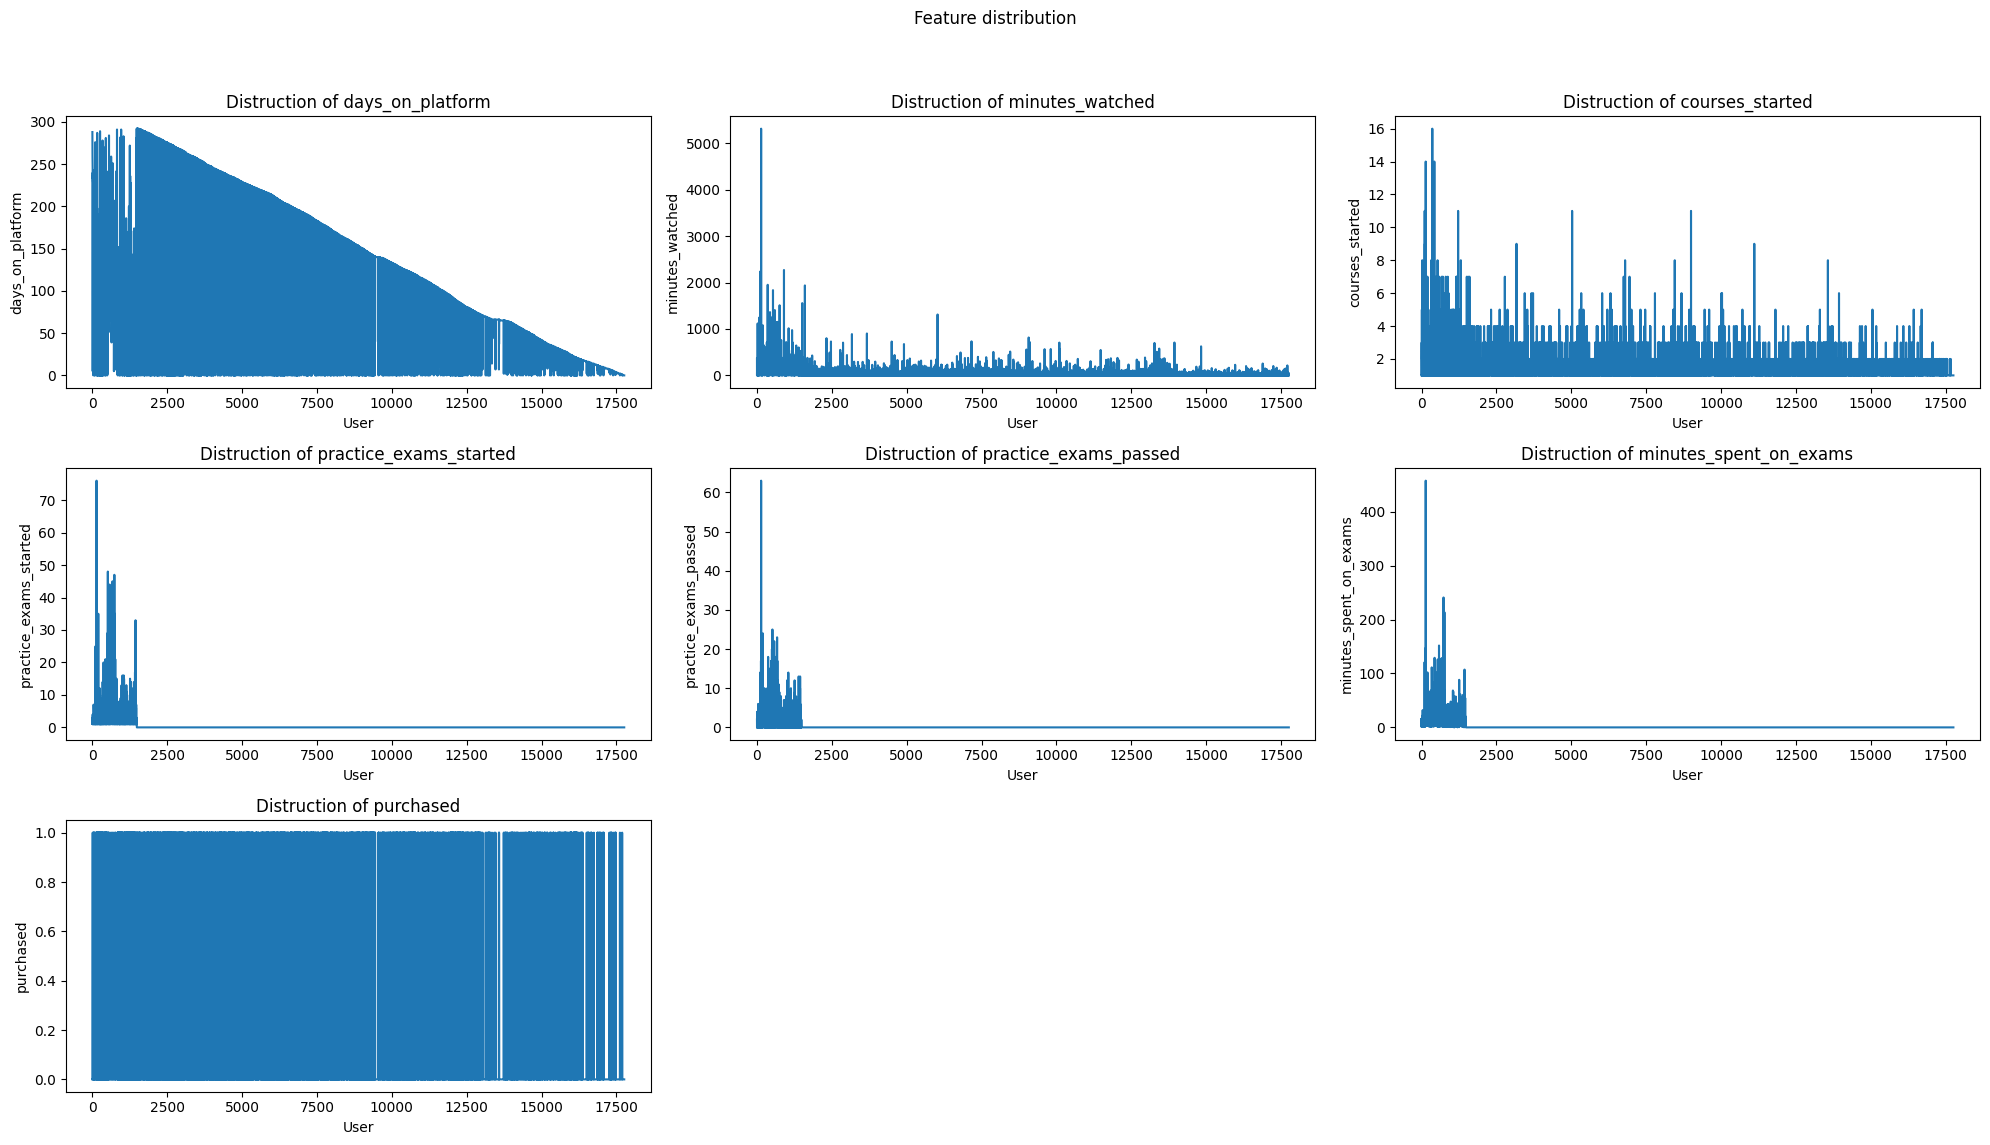

In [110]:
import math
num_features = 7
cols = 3
rows = math.ceil(num_features/cols)

#create subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, rows*4) )
fig.suptitle('Feature distribution')
axs = axs.flatten()

for i, feature in enumerate([ 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased']):
  axs[i].plot(data[feature], label=feature)
  axs[i].set_title(f'Distruction of {feature}')
  axs[i].set_xlabel(f'User')
  axs[i].set_ylabel(f'{feature}')

# Hide any empty subplots if features < grid size
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [111]:
data = data[
    (data['minutes_watched'] <= 1000) &
    (data['courses_started'] <= 10) &
    (data['practice_exams_started'] <= 10) &
    (data['minutes_spent_on_exams'] <= 40)
]


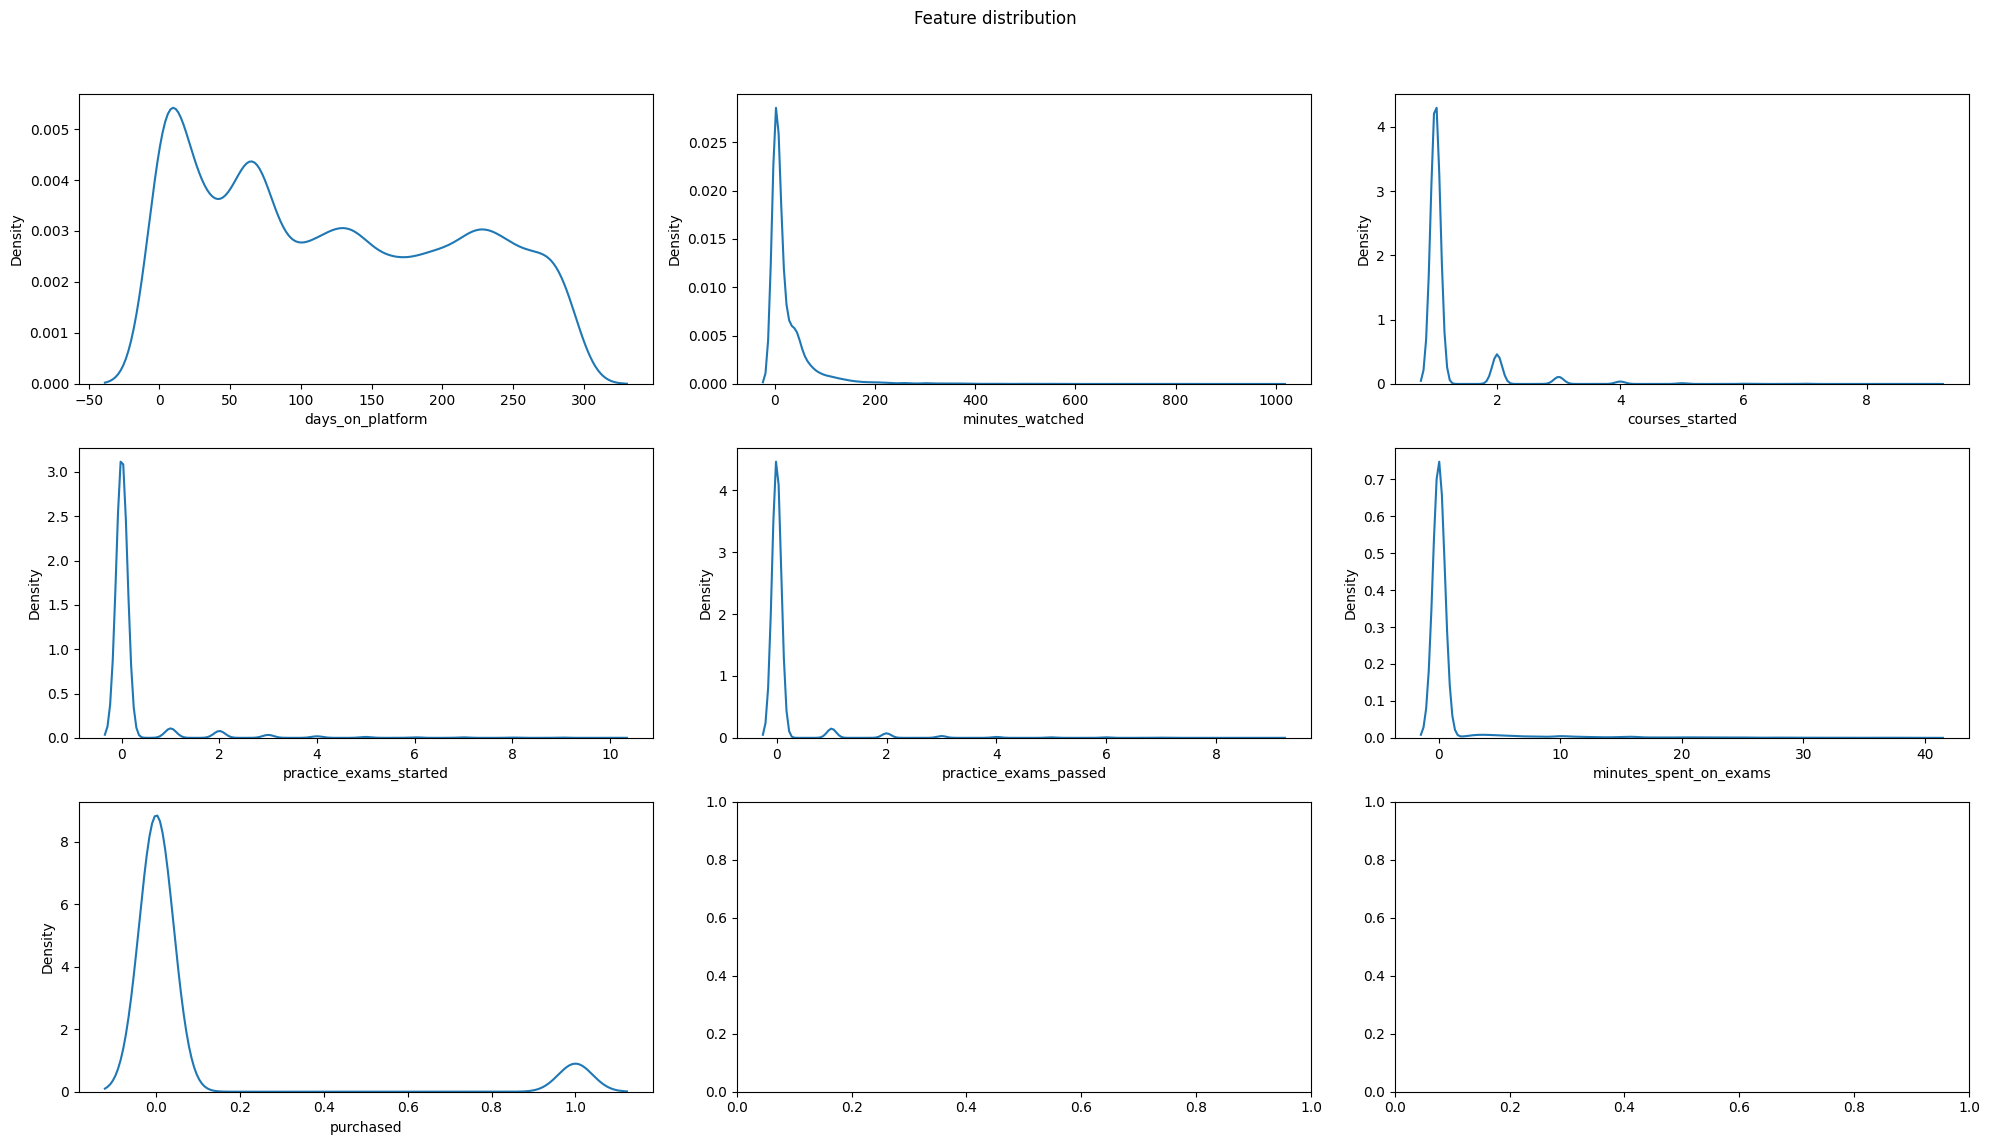

In [112]:
fig, axs = plt.subplots(rows, cols, figsize=(20, rows*4) )
fig.suptitle('Feature distribution')
axs = axs.flatten()

for i, feature in enumerate([ 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased']):
  sns.kdeplot(data=data[feature], ax=axs[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [113]:
data

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


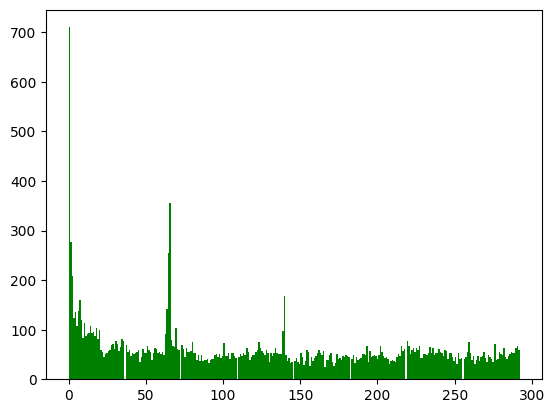

In [114]:
plt.hist(data['days_on_platform'], color = 'g', bins = 300)
plt.show()

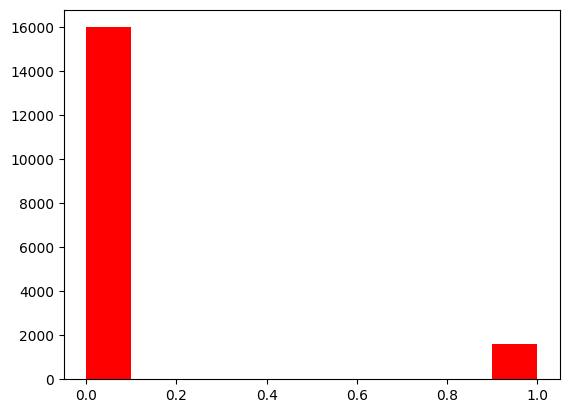

In [115]:
plt.hist(data['purchased'], color = 'r')
plt.show()

In [116]:
data['student_country'].value_counts()

IN    3351
US    2439
EG    1442
NG     875
GB     809
      ... 
TT       1
DM       1
VU       1
XK       1
CG       1
Name: student_country, Length: 171, dtype: int64

### Removing Outliers

In [117]:
Q_outlier = data['minutes_watched'].quantile(0.999)
Q_outlier

693.6125000000272

In [118]:
data = data[data['minutes_watched']<Q_outlier]


In [119]:
data.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000
mean,123.413108,26.371956,1.173614,0.182133,0.118015,0.773501,0.092174
std,90.763270,50.766128,0.544403,0.814090,0.585059,3.461499,0.289280
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.600000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,33.300000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,690.800000,9.000000,10.000000,9.000000,40.000000,1.000000


In [139]:
data['purchased'].value_counts()

0    15985
1     1623
Name: purchased, dtype: int64

### Checking for Multicollinearity

C:\Users\21268\AppData\Local\Temp\ipykernel_18428\2519191275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

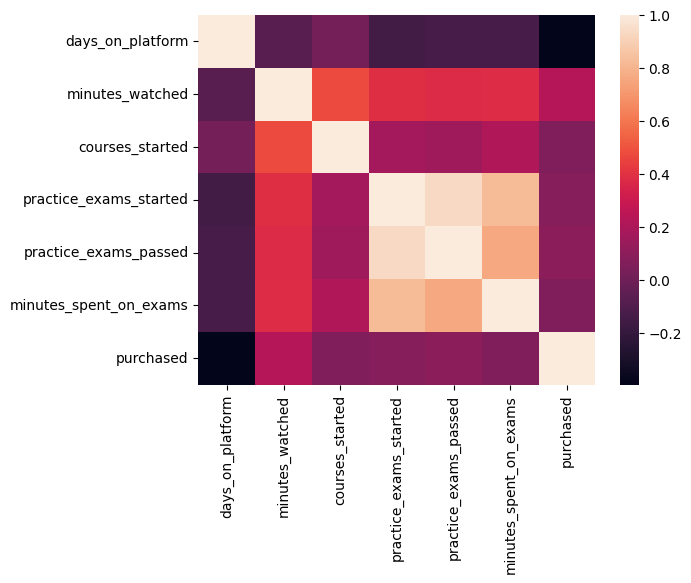

In [120]:
cor = data.corr()
cor
sns.heatmap(cor)

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns from the data
numeric_data = data.select_dtypes([int, float])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

print(vif_data)



                  Feature       VIF
0        days_on_platform  2.499803
1         minutes_watched  1.885701
2         courses_started  3.477394
3   practice_exams_passed  2.558315
4  minutes_spent_on_exams  2.617158
5               purchased  1.247982


In [ ]:
data.drop(['practice_exams_started'], axis=1, inplace=True)


### Dealing with NaN Values

In [126]:
data_null = data[data['student_country'].isna()]

In [ ]:
data['student_country'].fillna('NAM',axis = 1, inplace = True)

### Splitting the Data

In [129]:
from sklearn.model_selection import train_test_split


X,y = data.drop(['purchased'], axis = 1), data['purchased']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=365,stratify=y)

### Encoding the Data

In [133]:
from sklearn.preprocessing import OrdinalEncoder

categories = data['student_country'].unique()
categories


enc = OrdinalEncoder(categories=[categories])
X_train['student_country_enc'] = enc.fit_transform(X_train[['student_country']])
X_test['student_country_enc'] = enc.fit_transform(X_test[['student_country']])



In [135]:
X_train.drop('student_country', axis = 1, inplace = True)

X_test.drop('student_country', axis = 1, inplace = True)

In [136]:
X_train_array = np.asarray(X_train, dtype=float)
X_test_array = np.asarray(X_test, dtype=float)
y_train_array = np.asarray(y_train, dtype = int)
y_test_array = np.asarray(y_test, dtype = int)


# Creating a Logistic Regression Model

0.9520159000567859


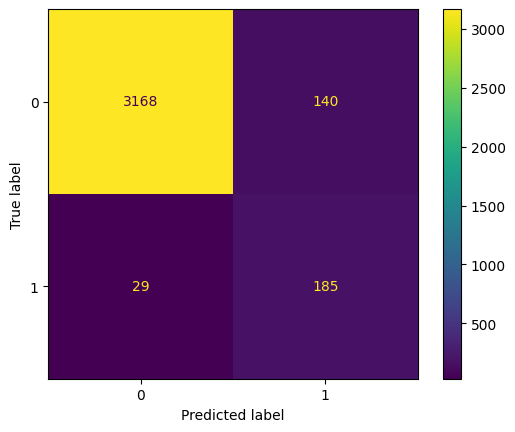

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

print(accuracy_score(y_pred, y_test))
conf = confusion_matrix(y_pred,y_test)

ConfusionMatrixDisplay(conf).plot()


Optimization terminated successfully.
         Current function value: 0.150894
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              purchased   No. Observations:                14086
Model:                          Logit   Df Residuals:                    14080
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Nov 2024   Pseudo R-squ.:                  0.5093
Time:                        16:52:26   Log-Likelihood:                -2125.5
converged:                       True   LL-Null:                       -4331.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0687      0.002    -31.232      0.000      -0.073      -0.064
x2             0.0154      0

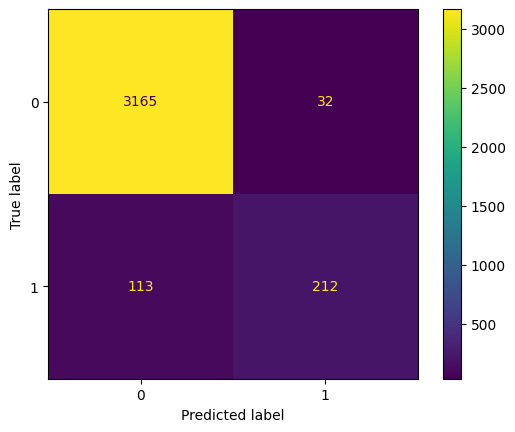

In [200]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression using statsmodels
log_reg = sm.Logit(y_train, X_train_array)  # Create Logit model
log_reg_results = log_reg.fit()  # Fit the model

# Print the summary of the logistic regression model
print(log_reg_results.summary())

# Predict the probabilities on the test set
y_pred_prob = log_reg_results.predict(X_test_array)

# Apply the 0.5 threshold to convert probabilities to class labels
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Display the accuracy and confusion matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Display confusion matrix visually
ConfusionMatrixDisplay(conf_matrix).plot()


# Creating a K-Nearest Neighbors Model

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


knn = KNeighborsClassifier()
parameters_knn = {'n_neighbors' : range(1,51), 'weights' : ['uniform', 'distance']}

grid_search_knn = GridSearchCV(knn, param_grid=parameters_knn, scoring='accuracy' )

grid_search_knn.fit(X_train_array, y_train_array)

knn = grid_search_knn.best_estimator_
print(grid_search_knn.best_params_)
y_pred = knn.predict(X_test_array)

0.9605337876206701


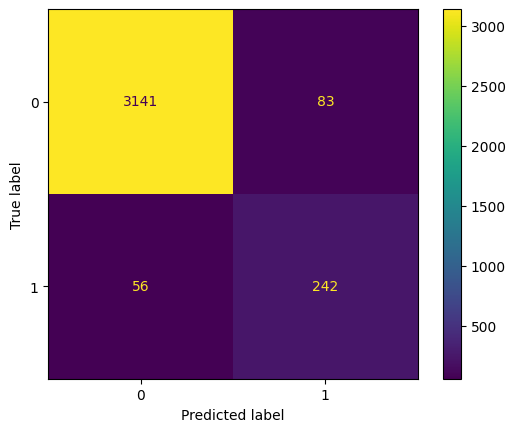

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

accuracy = accuracy_score(y_pred, y_test)
conf = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(conf).plot()
print(accuracy)

In [158]:
print(classification_report(y_pred, y_test, target_names=['not_purchased', 'purcheased']))

               precision    recall  f1-score   support

not_purchased       0.98      0.97      0.98      3224
   purcheased       0.74      0.81      0.78       298

     accuracy                           0.96      3522
    macro avg       0.86      0.89      0.88      3522
 weighted avg       0.96      0.96      0.96      3522



In [201]:
grid_search_knn.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

# Creating a Support Vector Machines Model

In [165]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

SVC_ml = SVC()
scaler = MinMaxScaler()
X_train_array_scaled = scaler.fit_transform(X_train_array)
X_test_array_scaled = scaler.transform(X_test_array)

In [162]:
svc_params = {
  'kernel' : ['linear', 'poly', 'rbf'],
  'C' : range(1,11),
  'gamma' : ['scale', 'auto']
}

In [166]:
svc = GridSearchCV(SVC_ml, param_grid=svc_params,scoring='accuracy')
svc.fit(X_train_array_scaled, y_train_array)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 11), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [167]:
svc_best_model = svc.best_estimator_

In [202]:
svc.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [173]:
y_pred = svc_best_model.predict(X_test_array_scaled)

In [174]:
print(f'Accuracy: {accuracy_score(y_pred, y_test)}')

Accuracy: 0.9585462805224304


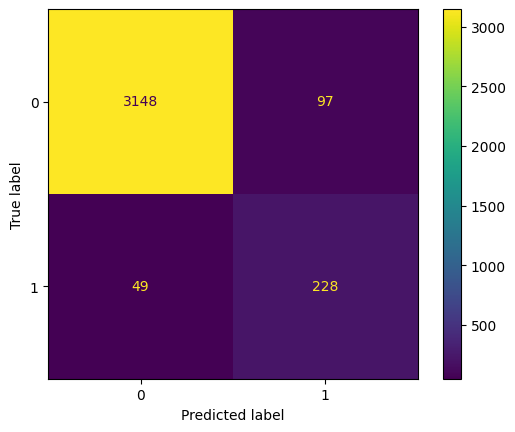

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3245
           1       0.70      0.82      0.76       277

    accuracy                           0.96      3522
   macro avg       0.84      0.90      0.87      3522
weighted avg       0.96      0.96      0.96      3522



In [176]:
conf = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(conf).plot()
plt.show()
print(classification_report(y_pred, y_test))

# Creating a Decision Trees Model

In [183]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
 

In [178]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV


dtcm = DecisionTreeClassifier()

tree_params = {'ccp_alpha' : [0,0.001,0.002,0.003,0.004,0.005]}


results_tree = GridSearchCV(dtcm, param_grid=tree_params, scoring = 'accuracy')
results_tree.fit(X_train_array, y_train_array)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring='accuracy')

In [179]:
best_tree = results_tree.best_estimator_

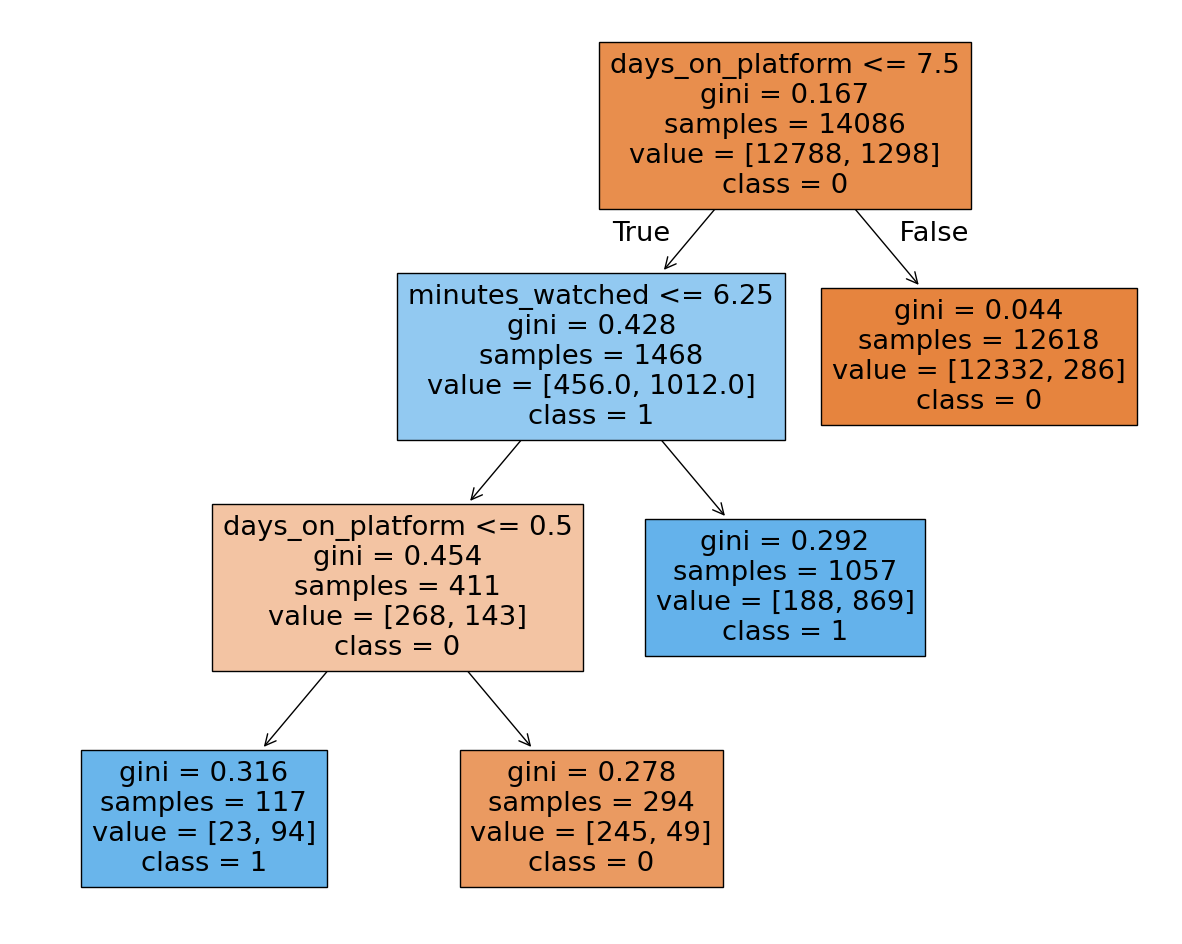

In [194]:
plt.figure(figsize=(15, 12))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in best_tree.classes_])
plt.show()

Accuracy: 0.9656445201590006


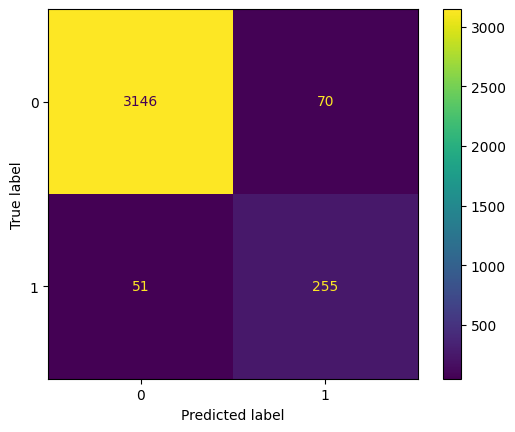

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3216
           1       0.78      0.83      0.81       306

    accuracy                           0.97      3522
   macro avg       0.88      0.91      0.89      3522
weighted avg       0.97      0.97      0.97      3522



In [181]:
y_pred = best_tree.predict(X_test_array)


print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
conf = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(conf).plot()
plt.show()
print(classification_report(y_pred, y_test))

In [195]:
results_tree.best_params_

{'ccp_alpha': 0.004}

# Creating a Random Forests Model

In [196]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(ccp_alpha=0.004, random_state=365)

rfc.fit(X_train_array, y_train_array)


RandomForestClassifier(ccp_alpha=0.004, random_state=365)

In [197]:
y_pred = rfc.predict(X_test_array)

Accuracy: 0.9662123793299262


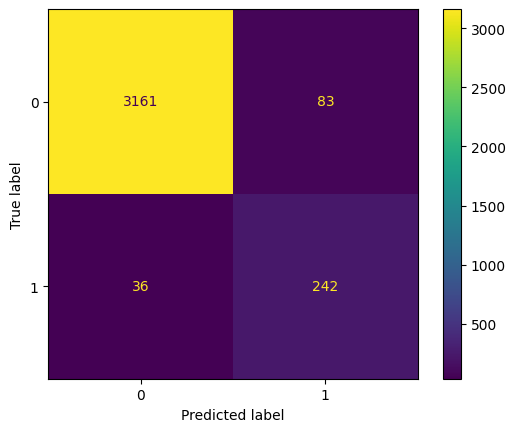

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3244
           1       0.74      0.87      0.80       278

    accuracy                           0.97      3522
   macro avg       0.87      0.92      0.89      3522
weighted avg       0.97      0.97      0.97      3522



In [198]:
print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
conf = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(conf).plot()
plt.show()
print(classification_report(y_pred, y_test))

In [199]:
len(X_test)

3522

In [206]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=["importance"])
print(feature_importances.sort_values(by="importance", ascending=False))


                        importance
days_on_platform          0.830734
minutes_watched           0.126900
student_country_enc       0.034190
practice_exams_passed     0.003830
courses_started           0.002740
minutes_spent_on_exams    0.001607
